# Análisis

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
# lo primero es llamar  a las variables de respuesta y a covariables

Respuesta = pd.read_csv("Votos_por_Municipio.csv", encoding = "utf8")
Covariables = pd.read_csv("Base_censo.csv", encoding = "utf8")

print(f"Total de filas de la base Respuesta {Respuesta.shape[0]}")
print(f"Total de filas de la base Covariables {Covariables.shape[0]}")

Total de filas de la base Respuesta 2463
Total de filas de la base Covariables 2469


El total de filas no coincide, vamos a trabajar solo con el total de las filas de la variable de respuesta. 

In [31]:
Base = pd.merge(Respuesta, Covariables , on ="C_Municipio")

print(f"El total de las filas de Base es {Base.shape[0]}")

El total de las filas de Base es 2463


In [32]:
# hay que verificar que se hizo un buen Merge
print(Base.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2463 entries, 0 to 2462
Data columns (total 36 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   C_Municipio  2463 non-null   object 
 1   AMLO         2463 non-null   float64
 2   Anaya        2463 non-null   float64
 3   Total_Votos  2463 non-null   int64  
 4   ENTIDAD_x    2463 non-null   int64  
 5   MUN_x        2463 non-null   int64  
 6   NOM_ENT      2463 non-null   object 
 7   ENTIDAD_y    2463 non-null   int64  
 8   NOM_MUN      2463 non-null   object 
 9   MUN_y        2463 non-null   int64  
 10  POBMAS       2463 non-null   float64
 11  POBFEM       2463 non-null   float64
 12  P_18A29      2463 non-null   float64
 13  P_18A29_F    2463 non-null   float64
 14  P_18A29_M    2463 non-null   float64
 15  P_30A44      2463 non-null   float64
 16  P_30A44_M    2463 non-null   float64
 17  P_30A44_F    2463 non-null   float64
 18  P_45A59      2463 non-null   float64
 19  P_45A5

El merge se realizo bien.

## Analisis exploratorio

Relacion de las ambas variables de respuesta

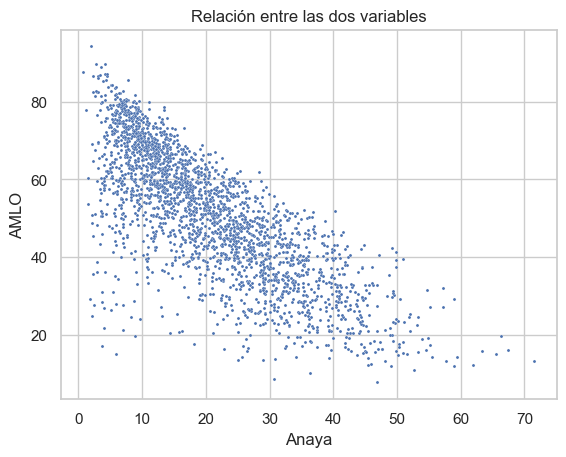

In [49]:
sns.scatterplot(Base, x="Anaya", y="AMLO",s=5)

plt.title("Relación entre las dos variables")
plt.xlabel("Anaya")
plt.ylabel("AMLO")
plt.show()

In [50]:
# Se observa que ambas variables estan relacionadas
cor =  Base["Anaya"].corr(Base["AMLO"])
print(f"La correlación esta dada por {cor}")

La correlación esta dada por -0.766786108053389


La correlación negativa entre las variables sugieren la presencia de factores no observados que favorecen sistemáticamente a un candidato mientras perjudican al otro, lo que indica una dinámica competitiva en la asignación del voto.

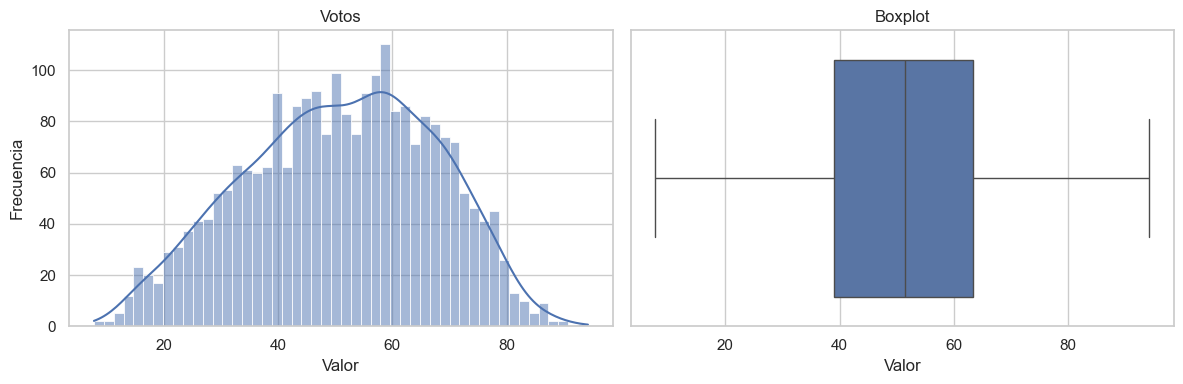

In [53]:
# Base de Trabajo para AMLO 
BaseAMLO = Base.iloc[:, [1] + list(range(12,36))]

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
# Histograma
sns.histplot(BaseAMLO["AMLO"], kde=True, ax=axes[0], bins = 50)
axes[0].set_title("Votos")
axes[0].set_xlabel("Valor")
axes[0].set_ylabel("Frecuencia")

sns.boxplot(x=data, ax=axes[1])
axes[1].set_title("Boxplot")
axes[1].set_xlabel("Valor")

plt.tight_layout()
plt.show()

No hay valores atipicos o extremos, la distribucion tiene ligero sesgo. Esto es un buen indicio que sugiere que se puede realizar un analisis paramétrico. 

Respecto a las covariables se tienen variables numericas, no categoricas.

In [56]:
my_cor = BaseAMLO.corr()